In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats



In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../data/boston_housing.csv')
df_nooutliertarget=pd.read_csv('../data/data_Nooutlierstarget.csv')

In [4]:
# our target value is medv--> median value
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### looking at the heat map prepared it looks like there are some highly correlated features like(indus,rm,tax,ptratio and lstat)

In [5]:
df.skew()

crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64

### Data from Crime,zn,dis,rad,medv,lstat seems to be heavily skewed towards right 
### age,rm,indus are moderately skeweed so we will use yeo johnson transformation
### and data from b seems to be skewed heavily towards left
### This means we should remove the outliers using other methods.
### chas is binary data so no need to transform

In [6]:
## For high skewness data(Logarithmic transformation)

df_skew=df.copy()
df_skew.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
# For heavily skewed data(note due to the presence of zero in chas and zn log stat wont work on them)
df_skew['log_lstat']=np.log(df_skew.lstat)
df_skew['log_crime']=np.log(df_skew.crim)
df_skew['log_dis']=np.log(df_skew.dis)
df_skew['log_rad']=np.log(df_skew.rad)
df_skew['log_medv']=np.log(df_skew.lstat)


In [8]:
# for data with zeros and ones wwe will use logit transformation and boxcox transformation
from scipy import stats
df_skew['box_zn'], best_lambda = stats.boxcox( df_skew['zn'] + 1)

#### for heavily negatively skewed data

In [9]:
df_skew['log_b'] = np.log(-df_skew['b'] + df_skew['b'].max() + 1)

### for moderately skewed data


In [10]:
df_skew['win_rm'] = mstats.winsorize(df_skew['rm'], limits=[0.05, 0.05])

I made a dta frame with transformed heavily skewed data

In [13]:
#df_heavyskew=df_skew.drop(['crim','zn','dis','rad','b','log_lstat','win_rm','medv'],axis=1,inplace=true)
df_heavyskew = pd.read_csv('../data/data_heavyskew.csv')

In [14]:
df_heavyskew=df_heavyskew[['log_crime','box_zn','indus','chas','nox','rm','age', 'log_dis','log_rad','tax','ptratio', 'log_b','lstat','log_medv']]
df_heavyskew.head()

,log_crime,box_zn,indus,chas,nox,rm,age,log_dis,log_rad,tax,ptratio,log_b,lstat,log_medv
0,-5.064036,1.027774,2.31,0,0.538,6.575,65.2,1.408545,0.000000,296,15.3,0.000000,4.98,1.605430
1,-3.600502,0.000000,7.07,0,0.469,6.421,78.9,1.602836,0.693147,242,17.8,0.000000,9.14,2.212660
2,-3.601235,0.000000,7.07,0,0.469,7.185,61.1,1.602836,0.693147,242,17.8,1.623341,4.03,1.393766
3,-3.430523,0.000000,2.18,0,0.458,6.998,45.8,1.802073,1.098612,222,18.7,1.184790,2.94,1.078410
4,-2.672924,0.000000,2.18,0,0.458,7.147,54.2,1.802073,1.098612,222,18.7,0.000000,5.33,1.673351


In [15]:
#df_heavyskew.to_csv('..\data\data_heavyskew.csv', index=False)

This data set will have transformed valur of highly correlated and skewed data from original data set

In [18]:
# data with skew of highly correlated variables only
#df_corskew=df_skew.drop(['log_crime','box_zn','log_dis','log_rad','log_b','lstat','rm','medv'],axis=1)
df_corskew = pd.read_csv('../data/data_corskew.csv')

In [19]:
df_corskew=df_corskew[['crim','zn','indus','chas','nox','win_rm','age', 'dis','rad','tax','ptratio', 'b','log_lstat','log_medv']]
df_corskew.head()

,crim,zn,indus,chas,nox,win_rm,age,dis,rad,tax,ptratio,b,log_lstat,log_medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,1.605430,1.605430
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,2.212660,2.212660
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,1.393766,1.393766
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,1.078410,1.078410
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,1.673351,1.673351


In [20]:
#df_corskew.to_csv('..\data\data_corskew.csv', index=False)

In [21]:
df_skew.skew()

crim         5.223149
zn           2.225666
indus        0.295022
chas         3.405904
nox          0.729308
rm           0.403612
age         -0.598963
dis          1.011781
rad          1.004815
tax          0.669956
ptratio     -0.802325
b           -2.890374
lstat        0.906460
medv         1.108098
log_lstat   -0.320232
log_crime    0.405934
log_dis      0.152730
log_rad      0.286617
log_medv    -0.320232
box_zn       1.071695
log_b        0.601359
win_rm       0.509775
dtype: float64

In [23]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [24]:
df_skew.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,...,lstat,medv,log_lstat,log_crime,log_dis,log_rad,log_medv,box_zn,log_b,win_rm
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,4.98,24.0,1.605430,-5.064036,1.408545,0.000000,1.605430,1.027774,0.000000,6.575
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,9.14,21.6,2.212660,-3.600502,1.602836,0.693147,2.212660,0.000000,0.000000,6.421
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,4.03,34.7,1.393766,-3.601235,1.602836,0.693147,1.393766,0.000000,1.623341,7.185
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,2.94,33.4,1.078410,-3.430523,1.802073,1.098612,1.078410,0.000000,1.184790,6.998
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,5.33,36.2,1.673351,-2.672924,1.802073,1.098612,1.673351,0.000000,0.000000,7.147


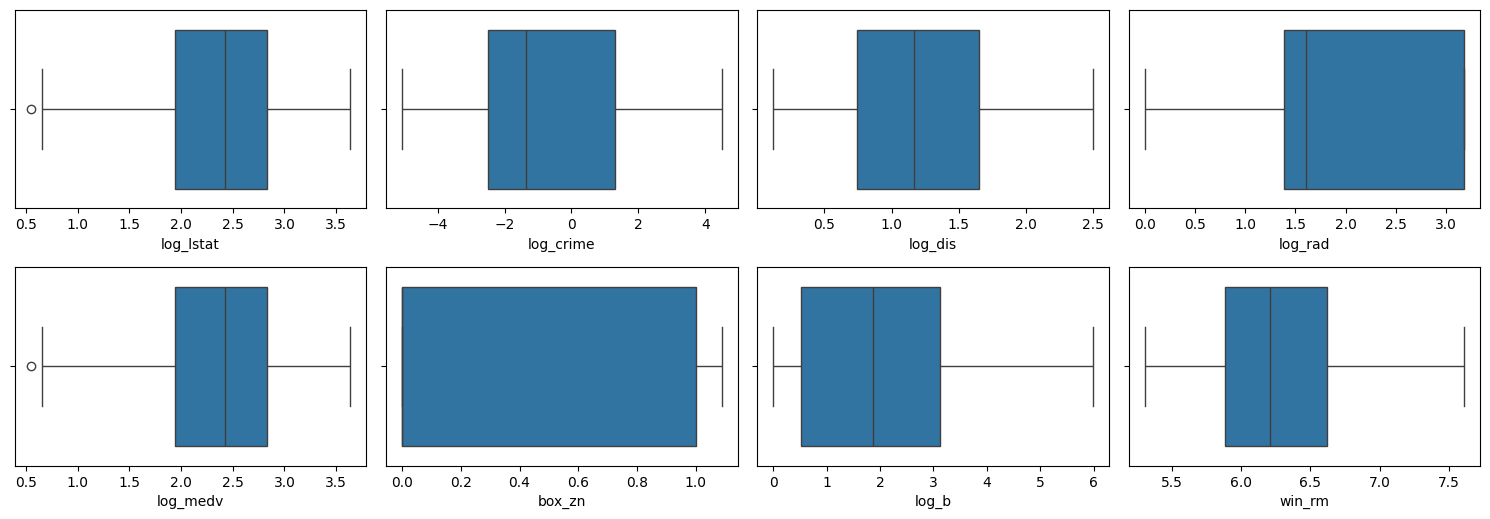

In [25]:
columns = ['log_lstat','log_crime','log_dis','log_rad','log_medv','box_zn','log_b','win_rm']

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns):
    plt.subplot(4, 4, i+1) 
    sns.boxplot(x=df_skew[col])

plt.tight_layout()
plt.show()

## Lets check heat map of all the transformed data

<Axes: >

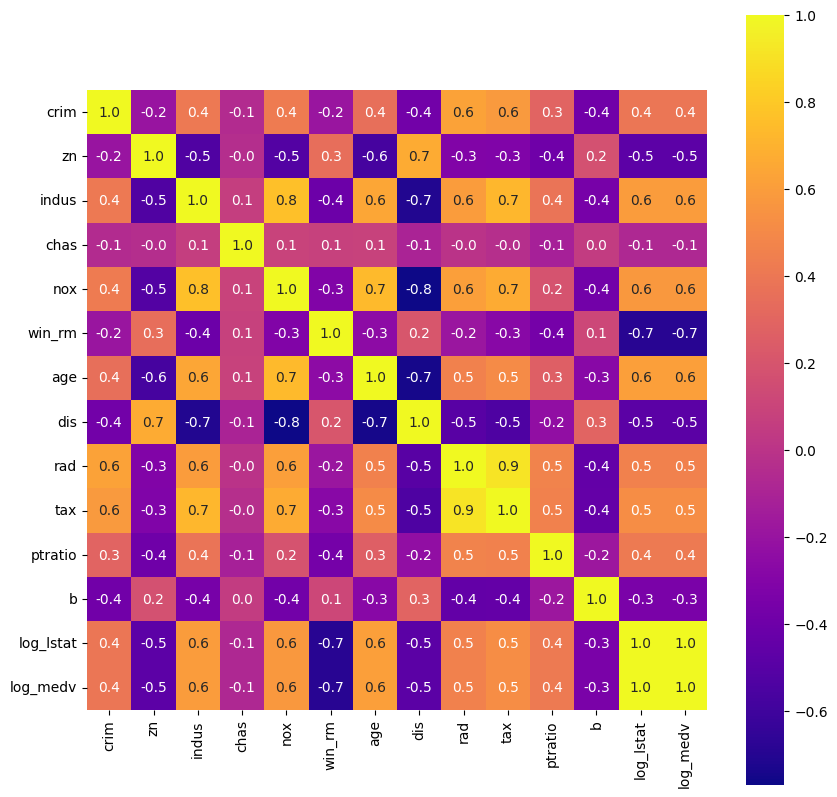

In [26]:
# heat map of Hevily corrleated skewed data which have been transformed
plt.figure(figsize=(10,10)) # 10 by 10 inches
sns.heatmap(df_corskew.corr(),cbar=True,fmt='.1f',annot=True,annot_kws={'size':10}, square=True,cmap="plasma")

This shows that there is heavy correlation of transformed rm, transformed lstat with transformed medv. though the transformation changed the relationship a lot.
and the datas relationship changed a lot so we will test the data for machine learning.

<Axes: >

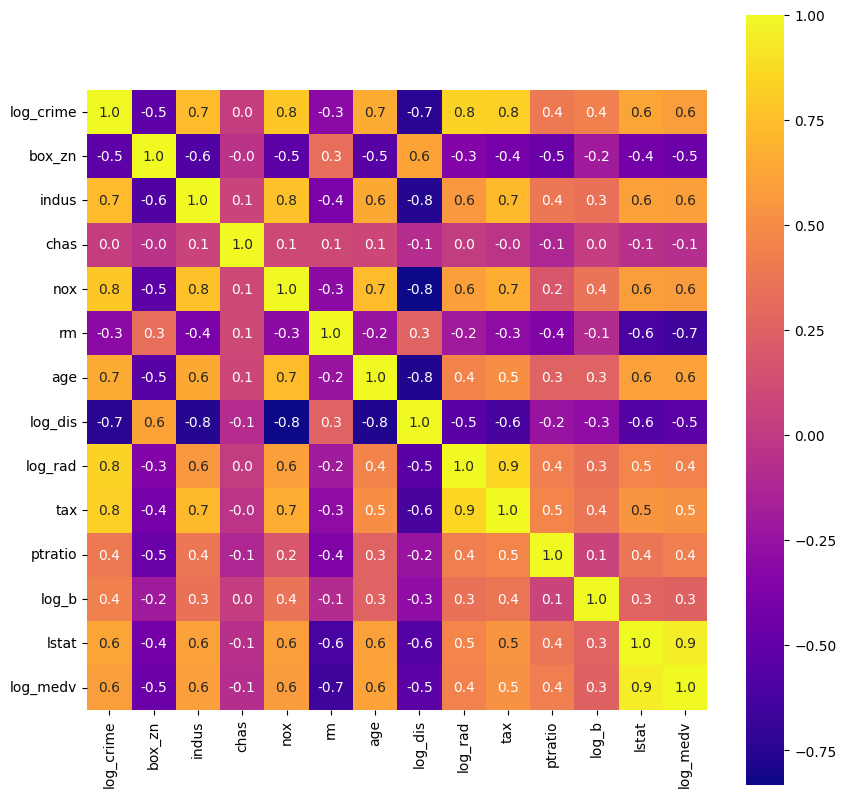

In [27]:
# heat map of Hevily corrleated skewed data which have been transformed
plt.figure(figsize=(10,10)) # 10 by 10 inches
sns.heatmap(df_heavyskew.corr(),cbar=True,fmt='.1f',annot=True,annot_kws={'size':10}, square=True,cmap="plasma")

Normalizing data sets

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_normalized=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# exporting normalised data frame
#df_normalized.to_csv('..\data\data_normalized.csv', index=False)

In [34]:
df_normalizedheavyskew=pd.DataFrame(scaler.fit_transform(df_heavyskew), columns=df_heavyskew.columns)
#df_normalizedheavyskew.to_csv('..\data\data_normalizedheavyskew.csv', index=False)

In [35]:
df_normalizedcorskew=pd.DataFrame(scaler.fit_transform(df_corskew), columns=df_corskew.columns)
#df_normalizedcorskew.to_csv('..\data\data_normalizedcorskew.csv', index=False)
